**Name:** Mehakk Lunkar<br>
**Registration No.:** 2448531<br>
**Lab-7:** Discrete time wrapping algorithm<br>

In [3]:
!pip install dtw-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.9/837.9 kB 16.4 MB/s eta 0:00:00


In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
signal1, sr1 = librosa.load('/content/raymond.wav')
signal2, sr2 = librosa.load('/content/gary.wav')
print("Sampling Rate 1:", sr1)
print("Sampling Rate 2:", sr2)
print("Length Signal 1:", len(signal1))
print("Length Signal 2:", len(signal2))

Sampling Rate 1: 22050
Sampling Rate 2: 22050
Length Signal 1: 42722
Length Signal 2: 38588


In [4]:
def normalize(sig):
    return sig / np.max(np.abs(sig))

signal1 = normalize(signal1)
signal2 = normalize(signal2)

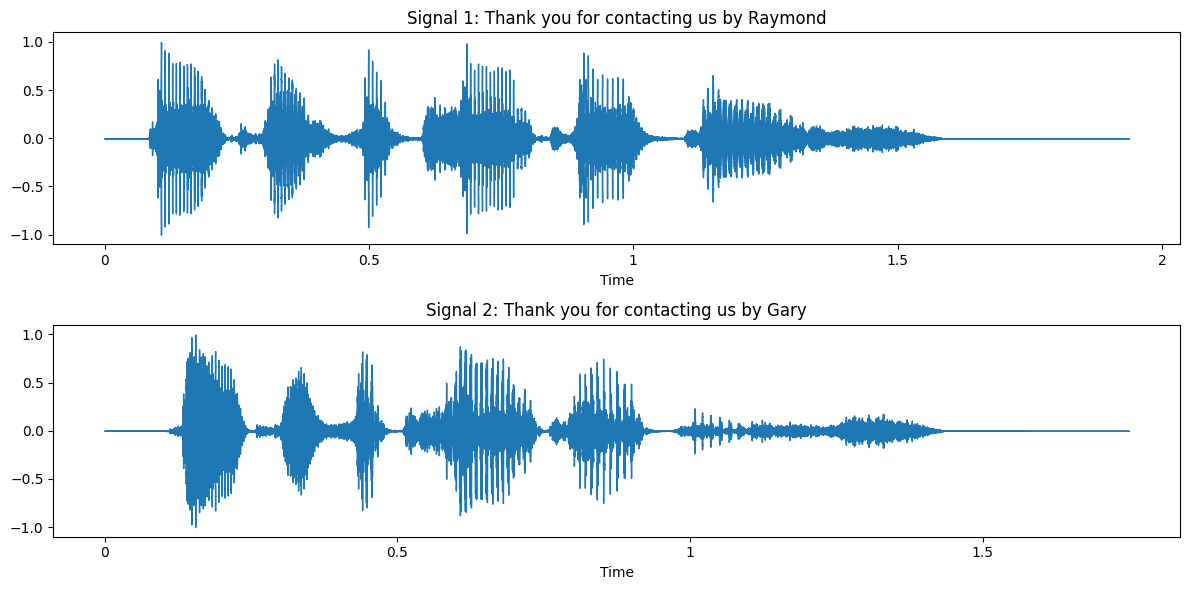

In [5]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.waveshow(signal1, sr=sr1)
plt.title("Signal 1: Thank you for contacting us by Raymond")

plt.subplot(2,1,2)
librosa.display.waveshow(signal2, sr=sr2)
plt.title("Signal 2: Thank you for contacting us by Gary")

plt.tight_layout()
plt.show()

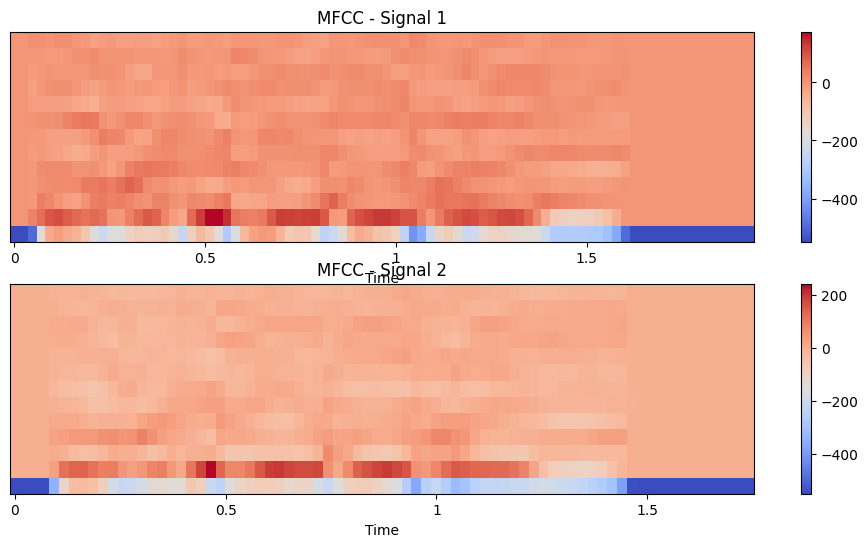

In [6]:
mfcc1 = librosa.feature.mfcc(y=signal1, sr=sr1, n_mfcc=13)
mfcc2 = librosa.feature.mfcc(y=signal2, sr=sr2, n_mfcc=13)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
librosa.display.specshow(mfcc1, x_axis='time')
plt.colorbar()
plt.title("MFCC - Signal 1")

plt.subplot(2,1,2)
librosa.display.specshow(mfcc2, x_axis='time')
plt.colorbar()
plt.title("MFCC - Signal 2")
plt.show()

In [7]:
from librosa.sequence import dtw as librosa_dtw

D, wp = librosa_dtw(X=mfcc1, Y=mfcc2, metric='euclidean')

dtw_distance = D[-1, -1]
print("\nDTW Distance:", dtw_distance)


DTW Distance: 6193.323265864107


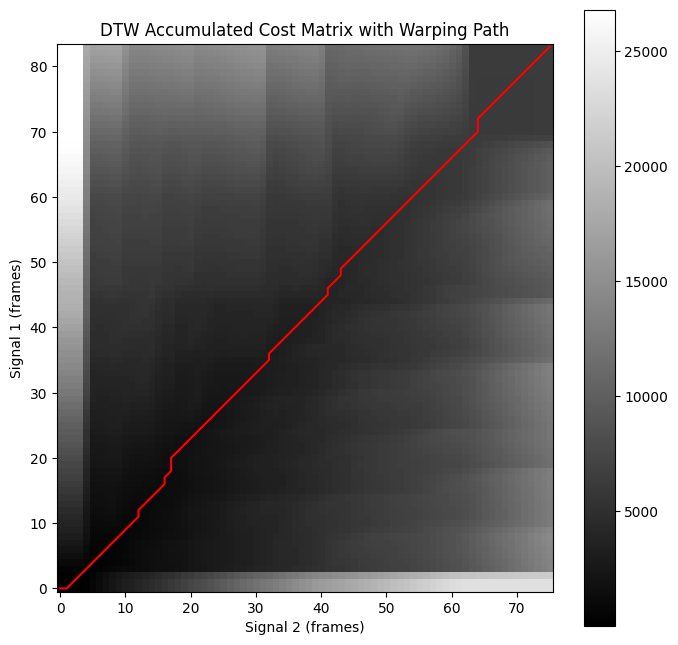

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(D, origin='lower', cmap='gray')
plt.plot(wp[:,1], wp[:,0], 'r')
plt.title("DTW Accumulated Cost Matrix with Warping Path")
plt.xlabel("Signal 2 (frames)")
plt.ylabel("Signal 1 (frames)")
plt.colorbar()
plt.show()

In [10]:

if dtw_distance < 200:
    print("\nInterpretation: VERY SIMILAR audio patterns.")
elif dtw_distance < 500:
    print("\nInterpretation: MODERATE similarity. Pronunciation differs slightly.")
else:
    print("\nInterpretation: LOW similarity. The voices differ in timing or tone.")


Interpretation: LOW similarity. The voices differ in timing or tone.
